In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**AutoEncoder**

The autoencoding is a data compressing technique used a lot in computer vision tasks, especially dealing with the human faces' detection, reconstruction and generating. Autoenders can do a deep-learning unsupervised task.

Autoencoders are learned automatically from data examples, which is a useful property: it means that it is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

Usually, an autoencoder algorithm is composed of an encoder process and a decoder process, which compress the data first and then release the information through different layers of linear operations or neural networks.

In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/Thesis/data/utrecht/*.jpg'
base = '/content/drive/My Drive/Colab Notebooks/Thesis/data/utrecht/'

Load packages for data preparation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn import model_selection 

**Data: Human Face Images**

131 images, 49 men, 20 women, usually a neutral and smile of each, collected at the European Conference on Visual Perception in Utrecht, 2008.  Some more to come, and 3d versions of these images in preparation.

The original resolution: 900x1200 colour.

For this tutorial, all images have been priorly compressed to 128x128 rgb images.

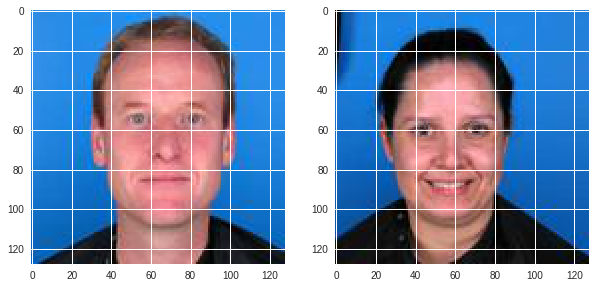

In [4]:
# Read the image from the google drive and display two examples.
img = glob.glob(pwd)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(mpimg.imread(img[0]))
ax = fig.add_subplot(1,2,2)
plt.imshow(mpimg.imread(img[10]))

Split the training and testing dataset (91 images in the training set and 30 images in the testing set).

Standardized the image matrices to [0,1] interval.

In [0]:
img_names = model_selection.train_test_split(img)

im_train = np.array([mpimg.imread(a) for a in img_names[0]])
im_test = np.array([mpimg.imread(a) for a in img_names[1]])

im_train = im_train.astype('float32') / 255.
im_test = im_test.astype('float32') / 255.

Load the keras packages.

In [6]:
from keras import layers
from keras import models

Using TensorFlow backend.


**Do a simple Autoencoder on the Black Channel and compare the result with the PCA**

A simple Autoencoder construction has two fully-connected layers of neural network as the encoder and the decoder layers. It simply compress the data into lower-dimensional space and then reconstruct the data back to the original dimension. When using the mean squared error as the loss function, this is just an approximation to the PCA (principle component analysis).

We would compare the result of such a simple autoencoder and a PCA.

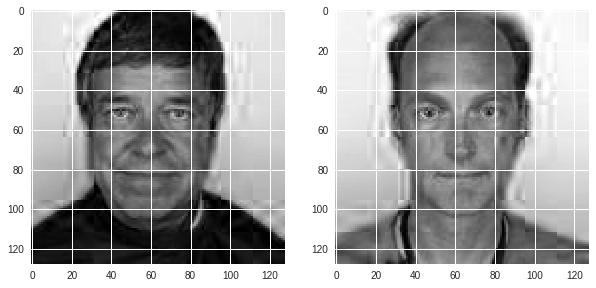

In [7]:
# Extract the black channel of the images
train_bl = np.array([mpimg.imread(a)[:,:,2] for a in img_names[0]])
test_bl = np.array([mpimg.imread(a)[:,:,2] for a in img_names[1]])
train_bl = train_bl.astype('float32') / 255.
test_bl = test_bl.astype('float32') / 255.

# Plot out two examples of the black channel in the gray color map
fig = plt.figure(figsize = (10,50))
ax = fig.add_subplot(1,2,1)
plt.imshow(train_bl[0])
plt.gray()
ax = fig.add_subplot(1,2,2)
plt.imshow(test_bl[1])
plt.gray()

# Reshape each image to numerical 1-dim vector
train_bl = train_bl.reshape((len(train_bl), np.prod(train_bl.shape[1:])))
test_bl = test_bl.reshape((len(test_bl), np.prod(test_bl.shape[1:])))

Construct the simple autoencoder algorithm

In [8]:
input_dim = 128*128 # The length of the input vector
encode_dim = 32*32 # The length of the compressed data vector after the encoding

simple_auto = models.Sequential()
simple_auto.add(layers.Dense(encode_dim,activation='relu'))
simple_auto.add(layers.Dense(input_dim,activation='sigmoid'))

# Using the 'adam' optimization method with the MSE loss function
simple_auto.compile(optimizer='adam', loss='mean_squared_error') 

simple_auto.fit(train_bl, train_bl, epochs=100,batch_size=10)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
91/91 [==============================] - 6s 66ms/step - loss: 0.0528
Epoch 2/100
91/91 [==============================] - 5s 57ms/step - loss: 0.0357
Epoch 3/100
91/91 [==============================] - 5s 56ms/step - loss: 0.0334
Epoch 4/100
91/91 [==============================] - 5s 56ms/step - loss: 0.0302
Epoch 5/100
91/91 [==============================] - 5s 57ms/step - loss: 0.0257
Epoch 6/100
91/91 [==============================] - 5s 56ms/step - loss: 0.0234
Epoch 7/100
91/91 [==============================] - 5s 56ms/step - loss: 0.0202
Epoch 8/100
91/91 [==============================] - 5s 57ms/step - loss: 0.0187
Epoch 9/100
91/91 [==============================] - 5s 56ms/step - loss: 0.0187
Epoch 10/100
91/91 [==============================] - 5s 57ms/step - loss: 0.0174
Epoch 11/100
91/91 [==============================] - 5s 57ms/step - 

Plot out 10 pairs of the original examples and the prediction made by the model

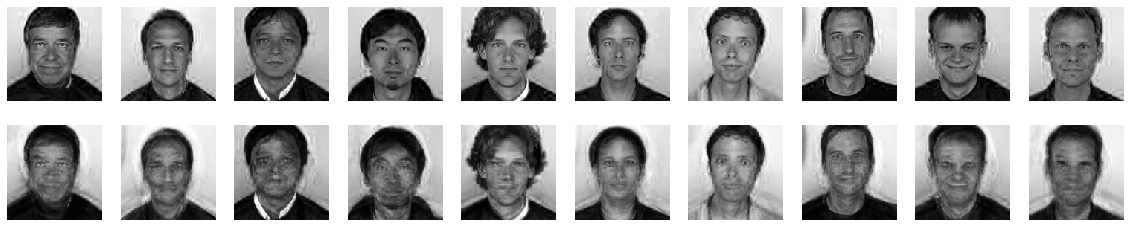

In [9]:
# For the training set
decoded_imgs = simple_auto.predict(train_bl)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

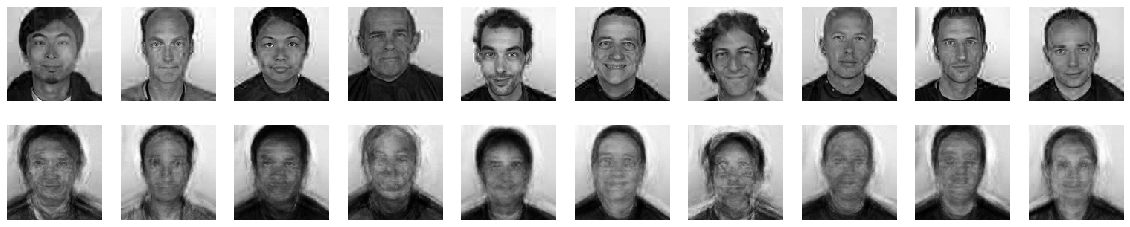

In [10]:
# For the testing set
decoded_imgs = simple_auto.predict(test_bl)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**PCA Eigen Faces**

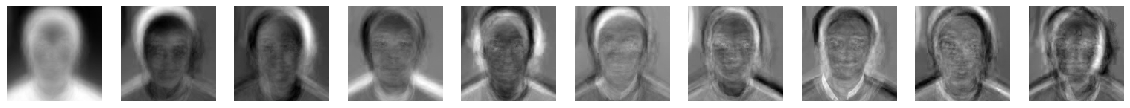

Explained Variance Ratio: [0.6285367  0.07417496 0.04693899 0.04040236 0.01910163 0.01515849
 0.01176408 0.01066126 0.00895956 0.00843655]


In [11]:
from sklearn import decomposition

n_c = 91 # number of components

pca = decomposition.PCA(n_components=n_c)
pca.fit(train_bl.T)
X = pca.transform(train_bl.T).T

plt.figure(figsize=(20, 4))
for i in range(n):
    # display 10 eigen faces
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print('Explained Variance Ratio:',pca.explained_variance_ratio_[0:10])

**Convolution Autoencoder**

To do a more deep-learning formed task, we could replace the encoding process and the decoding process by the Convolution Neural Network layers. So that especially the image data features could be compressed better and maintain more detailed information.

However, not as same as using the Convnet to do supervised learning, we would avoid to use the pooling layer in the autoencoder. Using pooling would underestimate the specific features for each images, wich would give worse result during reconsturction and the prediction. 

The pooling layers are commented out below and you could try it to see the difference.

Here we just use the autoencoding on the black channel of the images first.

In [12]:
Autoencoder_1c = models.Sequential()

Autoencoder_1c.add(layers.Conv2D(8,(3,3),activation='relu',padding='same',input_shape=(128,128,1)))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
Autoencoder_1c.add(layers.Conv2D(16,(3,3),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
Autoencoder_1c.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.MaxPooling2D((2,2),padding='same'))
#Autoencoder_1c.add(layers.Dense(16,activation='relu'))
Autoencoder_1c.add(layers.Conv2DTranspose(32,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(16,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(8,(4,4),activation='relu',padding='same'))
#Autoencoder_1c.add(layers.UpSampling2D((2,2)))
Autoencoder_1c.add(layers.Conv2DTranspose(1,(4,4),activation='sigmoid',padding='same'))

Autoencoder_1c.compile(optimizer='adam', loss='mean_squared_error')

Autoencoder_1c.summary()

Autoencoder_1c.fit(im_train[:,:,:,2].reshape(91,128,128,1), im_train[:,:,:,2].reshape(91,128,128,1), epochs=30,batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 128, 128, 32)      16416     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 16)      8208      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 128, 128, 8)       2056      
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 128, 128, 1)       129       
Total para

The training loss could go to 0.0007 and the testing loss could go to 0.0009. The black channel could be reconstructed very very close to the original black channel.

In [13]:
Autoencoder_1c.evaluate(im_test[:,:,:,2].reshape(31,128,128,1),im_test[:,:,:,2].reshape(31,128,128,1))

31/31 [==============================] - 2s 55ms/step


0.0009230610448867083

Plot out 10 pairs of the original examples and the prediction made by the model

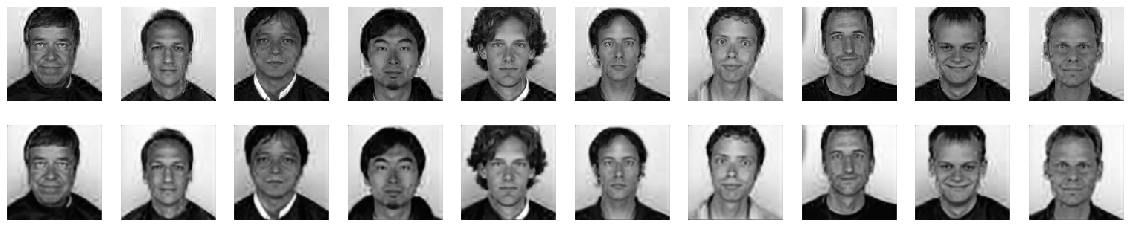

In [14]:
# For the trainig set
decoded_imgs = Autoencoder_1c.predict(im_train[:,:,:,2].reshape(91,128,128,1))
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

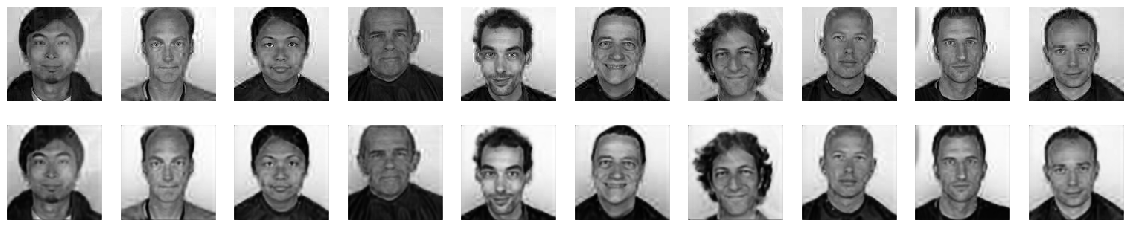

In [15]:
# For the testing set
decoded_imgs = Autoencoder_1c.predict(im_test[:,:,:,2].reshape(31,128,128,1))
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_bl[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**The Convnet-Deconvnet Autoencoder for all three channels**



In [16]:
Autoencoder = models.Sequential()

Autoencoder.add(layers.Conv2D(8,(3,3),activation='relu',padding='same',input_shape=(128,128,3)))
Autoencoder.add(layers.Conv2D(16,(3,3),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(32,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(16,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(8,(4,4),activation='relu',padding='same'))
Autoencoder.add(layers.Conv2DTranspose(3,(4,4),activation='sigmoid',padding='same'))

Autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Autoencoder.summary()

Autoencoder.fit(im_train, im_train, epochs=30,batch_size=10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 8)       224       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 128, 128, 32)      16416     
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 128, 128, 16)      8208      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 128, 128, 8)       2056      
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 128, 128, 3)       387       
Total para

The training loss goes to 0.0012 and the testing loss goes to 0.00135

In [17]:
Autoencoder.evaluate(im_test,im_test)

31/31 [==============================] - 2s 55ms/step


0.0013500666245818138

Plot out 10 pairs of the original examples and the prediction made by the model

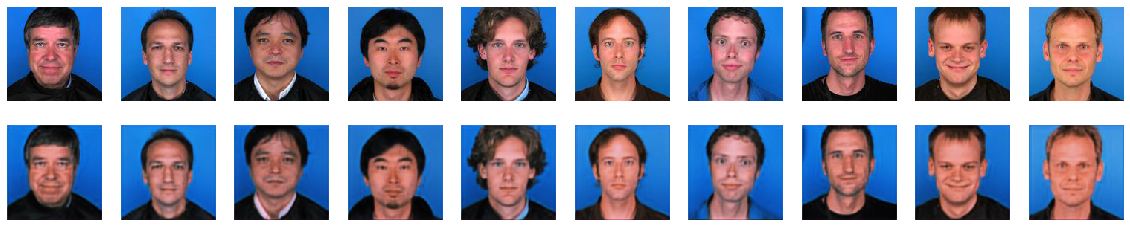

In [18]:
# For the training set
decoded_imgs = Autoencoder.predict(im_train)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(im_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

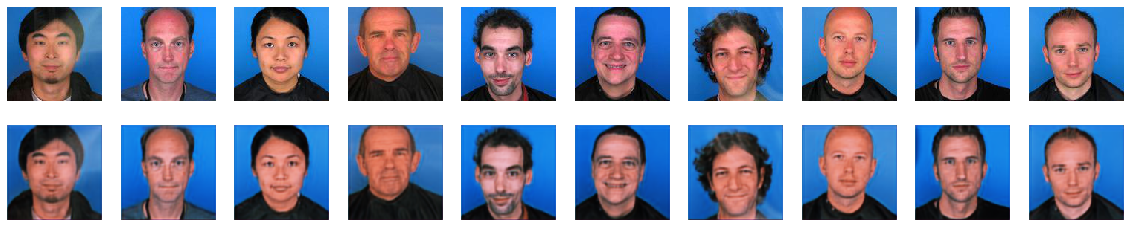

In [19]:
# For the testing set
decoded_imgs = Autoencoder.predict(im_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(im_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**Interpolation**

We could put a fully-connected layer (FC layer) between the encoding and the decoding process. The FC layer contains the information eoncoded and we could generate the value for the FC layer from a normal distribution to create the similar images.